In [2]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import linear_model

In [3]:
cifar10.data_path = "data/CIFAR-10/"

In [4]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [5]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [7]:
images_train.shape,cls_train.shape,labels_train.shape

((50000, 32, 32, 3), (50000,), (50000, 10))

In [8]:
images_train.shape

(50000, 32, 32, 3)

In [9]:
print(images_train[0][0][0],cls_train[0],labels_train[0])

[0.23137255 0.24313725 0.24705882] 6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

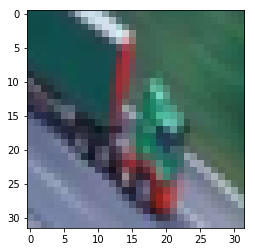

In [11]:
plt.imshow(images_train[50],cmap=plt.cm.bone)
plt.show()

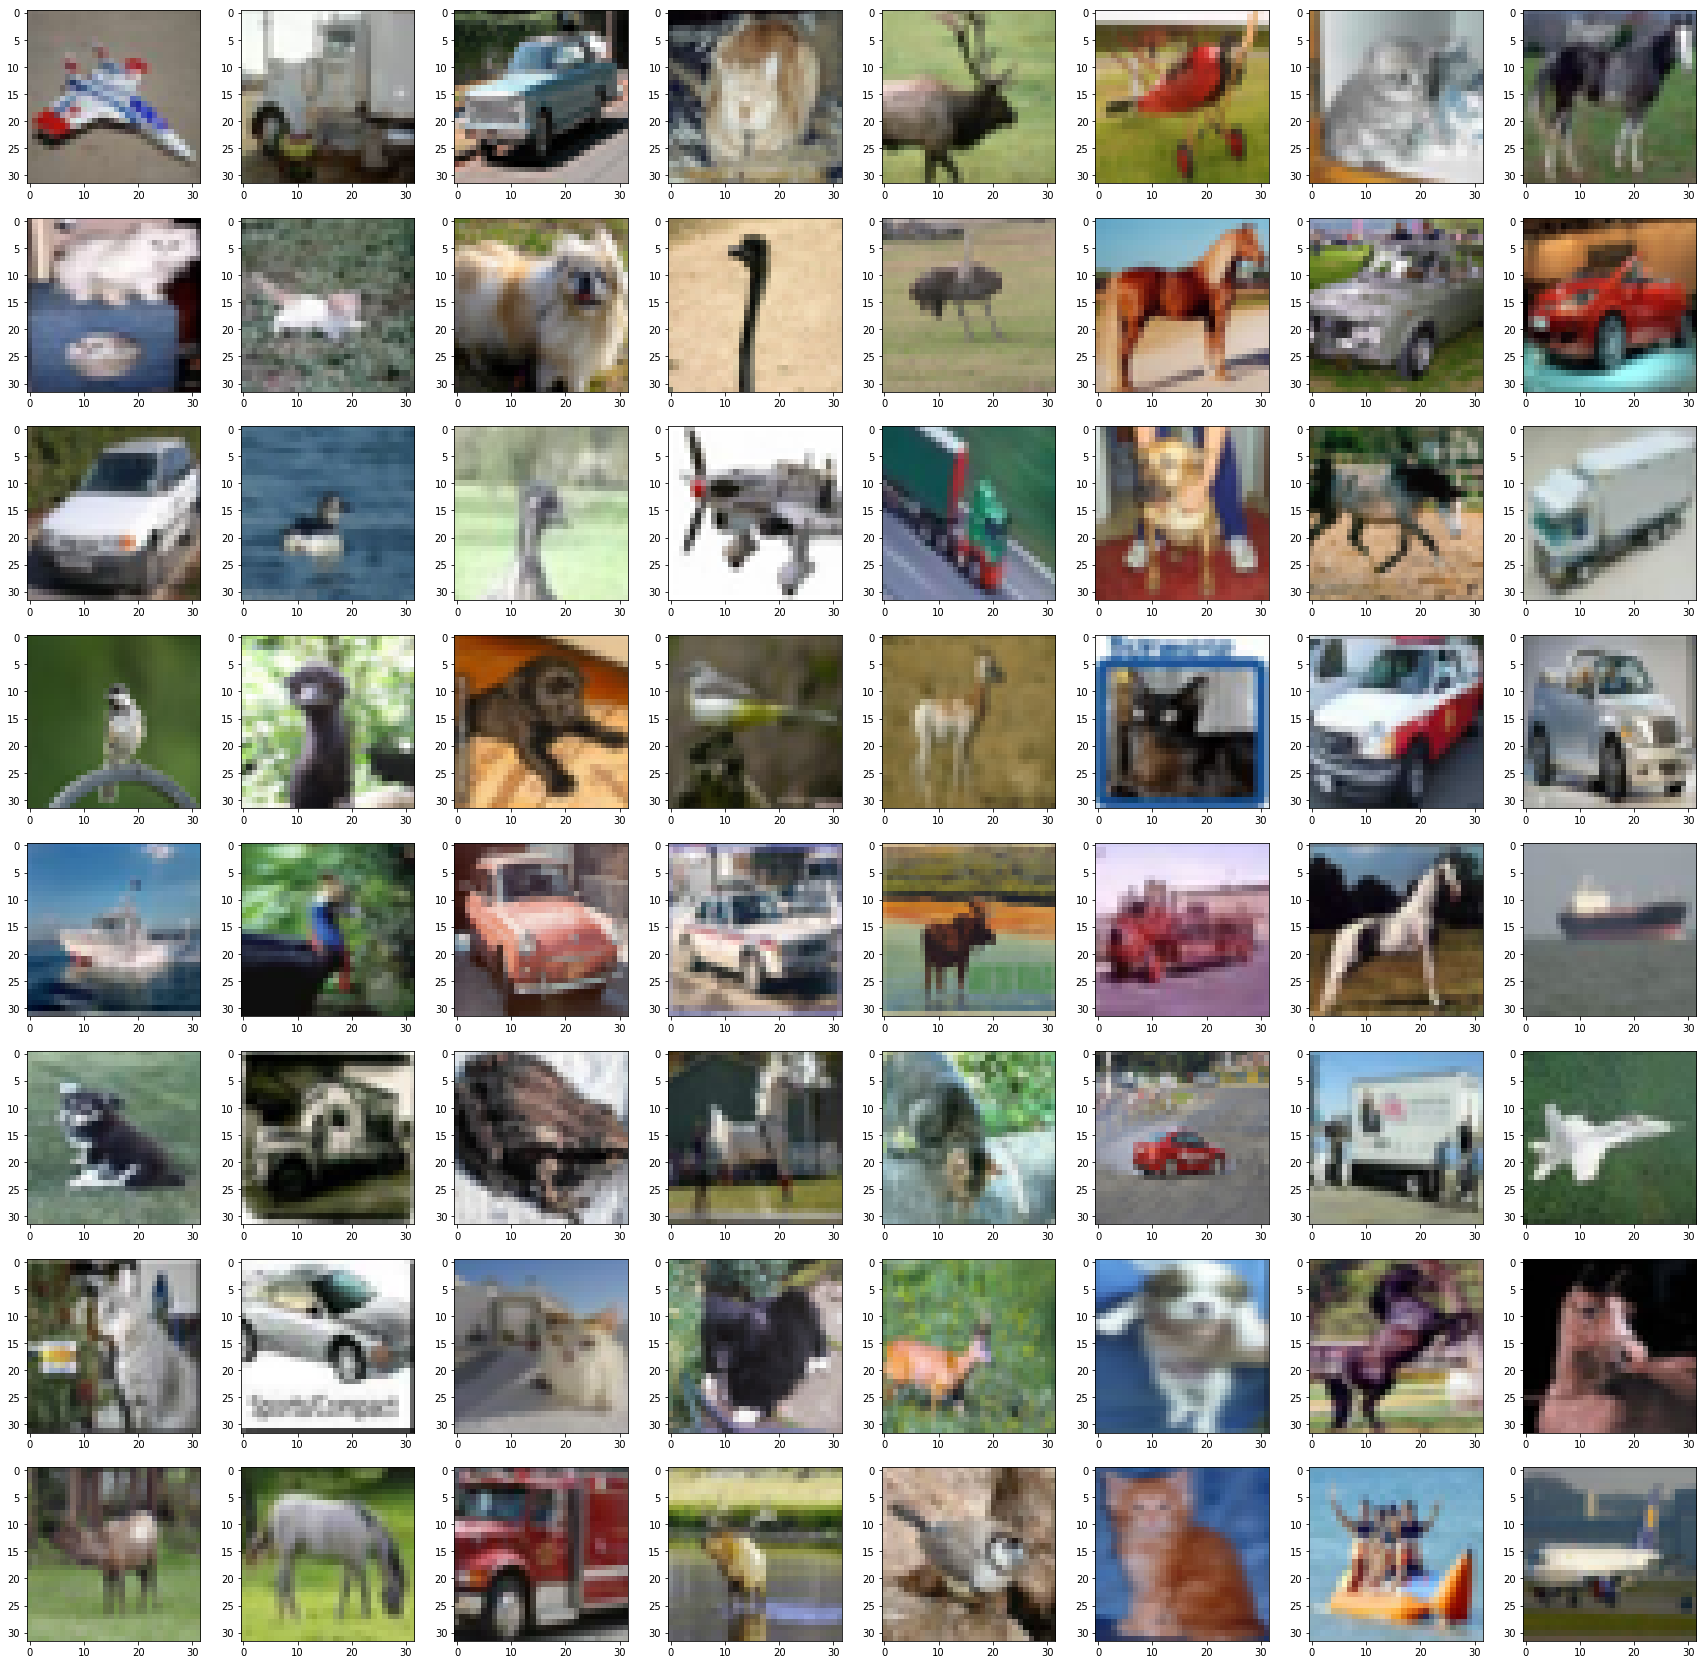

In [12]:
fig=plt.figure(figsize=(30,30))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(images_train[i+30],cmap=plt.cm.bone)
plt.show()

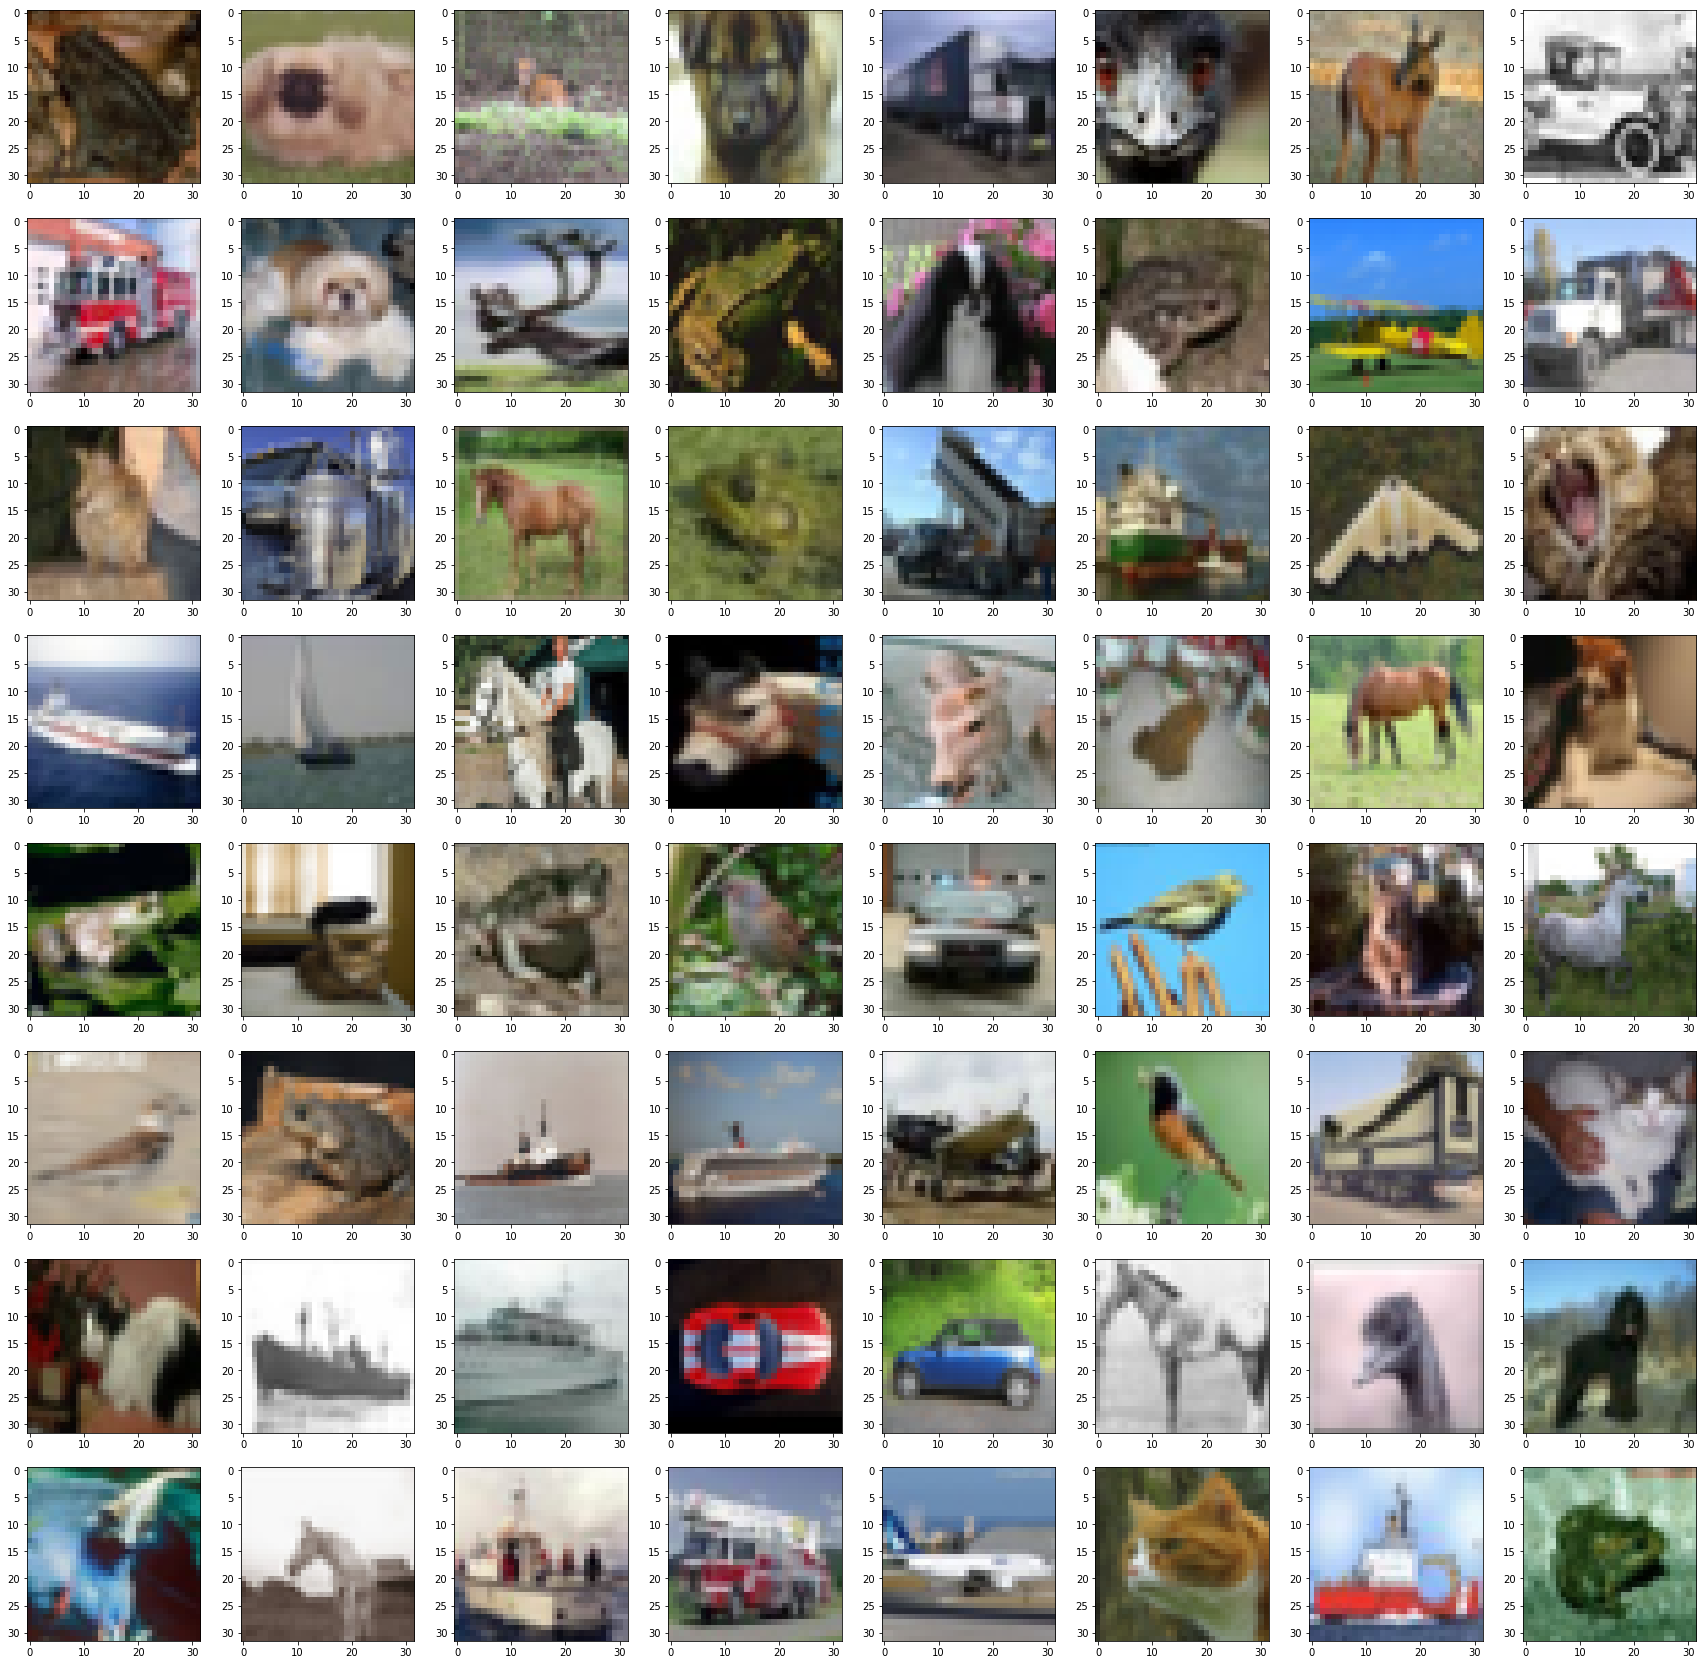

In [13]:
fig=plt.figure(figsize=(30,30))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(images_test[i+30],cmap=plt.cm.bone)
plt.show()

In [14]:
images_train = images_train.reshape(50000,32*32*3)

In [15]:
images_test = images_test.reshape(10000,32*32*3)

In [16]:
images_train.shape

(50000, 3072)

In [17]:
images_test.shape

(10000, 3072)

In [18]:
pca = PCA()

In [19]:
pca.fit(images_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
k=0
total=0
while total<0.95:
    total+=pca.explained_variance_ratio_[k]
    k+=1
print(k)

pca=PCA(n_components=k,whiten=True) #whiten works eqivalent to feature scaling in these k features


217


In [21]:
transformed_train = pca.fit_transform(images_train)
transformed_train.shape

(50000, 217)

In [22]:
transformed_test = pca.transform(images_test)
transformed_test.shape

(10000, 217)

In [23]:
pca.components_.shape

(217, 3072)

In [24]:
clf = svm.SVC(C= 100, gamma=0.005)
clf.fit(transformed_train, cls_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
clf.score(transformed_test,cls_test)

0.5643

In [26]:
preds = clf.predict(transformed_test)


In [27]:
preds

array([3, 8, 0, ..., 2, 5, 7])

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_names)

list(le.classes_)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [29]:
preds = list(le.inverse_transform(preds))
preds

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['cat',
 'ship',
 'airplane',
 'airplane',
 'cat',
 'frog',
 'automobile',
 'frog',
 'deer',
 'automobile',
 'airplane',
 'truck',
 'bird',
 'horse',
 'truck',
 'ship',
 'cat',
 'cat',
 'ship',
 'frog',
 'horse',
 'bird',
 'airplane',
 'truck',
 'deer',
 'frog',
 'bird',
 'deer',
 'truck',
 'frog',
 'frog',
 'deer',
 'bird',
 'cat',
 'truck',
 'automobile',
 'frog',
 'truck',
 'truck',
 'dog',
 'deer',
 'frog',
 'cat',
 'frog',
 'airplane',
 'truck',
 'dog',
 'cat',
 'deer',
 'bird',
 'truck',
 'ship',
 'dog',
 'cat',
 'ship',
 'ship',
 'dog',
 'ship',
 'dog',
 'deer',
 'horse',
 'cat',
 'frog',
 'truck',
 'frog',
 'bird',
 'automobile',
 'airplane',
 'dog',
 'truck',
 'deer',
 'dog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'truck',
 'cat',
 'cat',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'airplane',
 'horse',
 'cat',
 'airplane',
 'ship',
 'truck',
 'ship',
 'dog',
 'ship',
 'frog',
 'deer',
 'horse',
 'frog',
 'bird',
 'horse',
 'horse',
 'deer',
 'deer',
 'frog',


In [30]:
import pandas as pd
pd.DataFrame(preds).to_csv("predictions.csv")

In [32]:
x_approx=pca2.inverse_transform(transformed_train)
x_approx.shape
x_approx=x_approx.reshape((50000,32,32,3))

NameError: name 'pca2' is not defined

In [ ]:
x_approx.shape

In [ ]:
fig=plt.figure(figsize=(30,30))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)# rows and columns and image number starting from 1
    ax.imshow(x_approx[i+30],cmap=plt.cm.bone)
plt.show()